In [292]:
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import pandas as pd, numpy as np, math
import matplotlib.pyplot as plt
import matplotlib.ticker


In [ ]:


scopes = ['https://www.googleapis.com/auth/spreadsheets.readonly']

spreadsheet_id = '1IKBqledzC7gp_YByndemu9L0-EnWQpG5ZiXVkQZaPz8'
spreadsheet_name = 'da_assignment!A1:Z'

creds = None

if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        creds = pickle.load(token)
        
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file('/home/trang/Downloads/credentials.json', scopes)
        creds = flow.run_local_server(port=0)

    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

service = build('sheets','v4', credentials = creds)

request_data = service.spreadsheets().values().get(spreadsheetId=spreadsheet_id, range=spreadsheet_name)
data = request_data.execute()

In [43]:
publications = pd.DataFrame(data['values'][1:], columns=data['values'][0])
publications.shape

(1818, 9)

In [44]:
## Clean data
## Remove NA values
publications['is_na'] = publications.isna().apply(sum,1)
publications[publications['is_na'] > 0]

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,is_na


In [229]:
## Empty value
publications['is_empty'] = publications.apply(lambda x:x == '', 1).apply(sum,1)
empty_detail = publications.apply(lambda x:x == '', 0).apply(sum,0)
empty_detail

publication_time                     0
publication_id                       1
duplicate_id                         2
publication_channel                  0
publication_language                 0
predicted_relevance_probability      2
topic                               81
is_relevant                        335
verification_date                    0
is_na                                0
is_empty                             0
dtype: int64

In [46]:
## Clean empty value
publications_non_empty = publications[publications['is_empty'] == 0]
publications_non_empty

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,is_na,is_empty
0,2017-04-26T19:51:29,5900fa4c26d815005b0e12fb,58f61e2826fae8266a5c5c55,twitter,de,0.8309,Financial Services,TRUE,2017-04-28,0,0
1,2017-04-26T13:38:00,5900a3930527ca0036073b81,58f61e2826fae8266a5c5c55,news,de,0.9015,Financial Services,TRUE,2017-04-28,0,0
2,2017-05-03T06:38:00,5909845c6961040062ae9a45,58f61e2826fae8266a5c5c55,news,de,0.8146,Technology,TRUE,2017-04-05,0,0
3,2017-05-03T13:29:47,5909db5626d81500abd24913,58f61e2826fae8266a5c5c55,twitter,de,0.7276,Technology,TRUE,2017-04-05,0,0
4,2017-05-03T18:36:55,590a2363fa50770923db8ca9,58f61e2826fae8266a5c5c55,news,de,0.8017,Technology,TRUE,2017-04-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1425,2017-07-20T14:32:27,5970bf1220c5100076f8e68d,5951bf90d45331006e52148f,news,en,0.8942,Media,TRUE,2017-07-25,0,0
1426,2017-07-21T15:52:28,59722347ccef280068f62f3d,5971e9c0ccef280068b0e8d9,twitter,en,0.8697,Professional Services,TRUE,2017-07-26,0,0
1427,2017-07-23T20:55:48,59750d5fccef2800721d8e52,5971e9c0ccef280068b0e8d9,twitter,en,0.9695,Professional Services,TRUE,2017-07-26,0,0
1428,2017-07-24T07:15:32,5975bf617ae547007598abab,59759f30ccef2800729e3eb7,blog,en,0.9611,Professional Services,TRUE,2017-07-26,0,0


In [47]:
## Remove duplicate duplicate_id values
publications_cleaned = publications_non_empty.sort_values(['duplicate_id', 'verification_date', 'publication_time'], ascending = [True,False,True]).drop_duplicates('duplicate_id',keep='first')
publications_cleaned

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,is_na,is_empty
807,2017-05-08T06:40:20,591012df26d81503c1dd7a3e,560ce3c275cb1d1a549e4f11,twitter,en,0.6996,Financial Market Professionals,TRUE,2017-09-05,0,0
1042,2017-07-23T17:26:19,5974dc45ccef280072e77b36,565e44a6f44fe80f96e98ff5,twitter,en,0.8606,Technology,TRUE,2017-07-25,0,0
907,2017-06-26T20:00:01,595168c493fc530e398ea9b4,565e7570f44fe81072d121e1,twitter,en,0.8687,Financial Services,TRUE,2017-06-28,0,0
480,2017-06-08T09:03:14,5939142f5ee4fa22653bee49,566e3f14324fab282082cbca,twitter,en,0.8695,Currencies,TRUE,2017-09-06,0,0
657,2017-06-05T12:36:21,593550f61a208e0a8d0dafaa,56af978d324fab2160b8820d,twitter,en,0.7733,Telecommunications,TRUE,2017-12-06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1403,2017-07-19T20:31:38,596fc1b4ca8ebc034275fa98,596fc18eca8ebc034275ca21,twitter,en,0.8689,Basic Materials,TRUE,2017-07-21,0,0
1412,2017-07-20T03:55:03,597029a2ca8ebc0342e8cad7,597025feca8ebc0342e54c0c,twitter,en,0.9745,Currencies,TRUE,2017-07-21,0,0
1414,2017-07-20T06:40:40,59705073ca8ebc034207fcb1,59704e9dca8ebc0342069e90,twitter,en,0.9883,Currencies,TRUE,2017-07-21,0,0
1426,2017-07-21T15:52:28,59722347ccef280068f62f3d,5971e9c0ccef280068b0e8d9,twitter,en,0.8697,Professional Services,TRUE,2017-07-26,0,0


In [77]:
# Data aggregation
# aggregate by topic, return count of publication
agg_topic = publications_cleaned.groupby('topic').count()['publication_id'].sort_values()
agg_topic.shape

(24,)

In [119]:
# Aggregate by publication_language and publication_channel, return the count of publications
agg_language_channel = publications_cleaned.groupby(['publication_language','publication_channel']).count()['publication_id']

In [50]:
# Aggregate by publication_language and topic and is_relevant, return the count of publications
agg_language_topic_relevant = publications_cleaned.groupby(['publication_language','topic','is_relevant']).count()['publication_id']

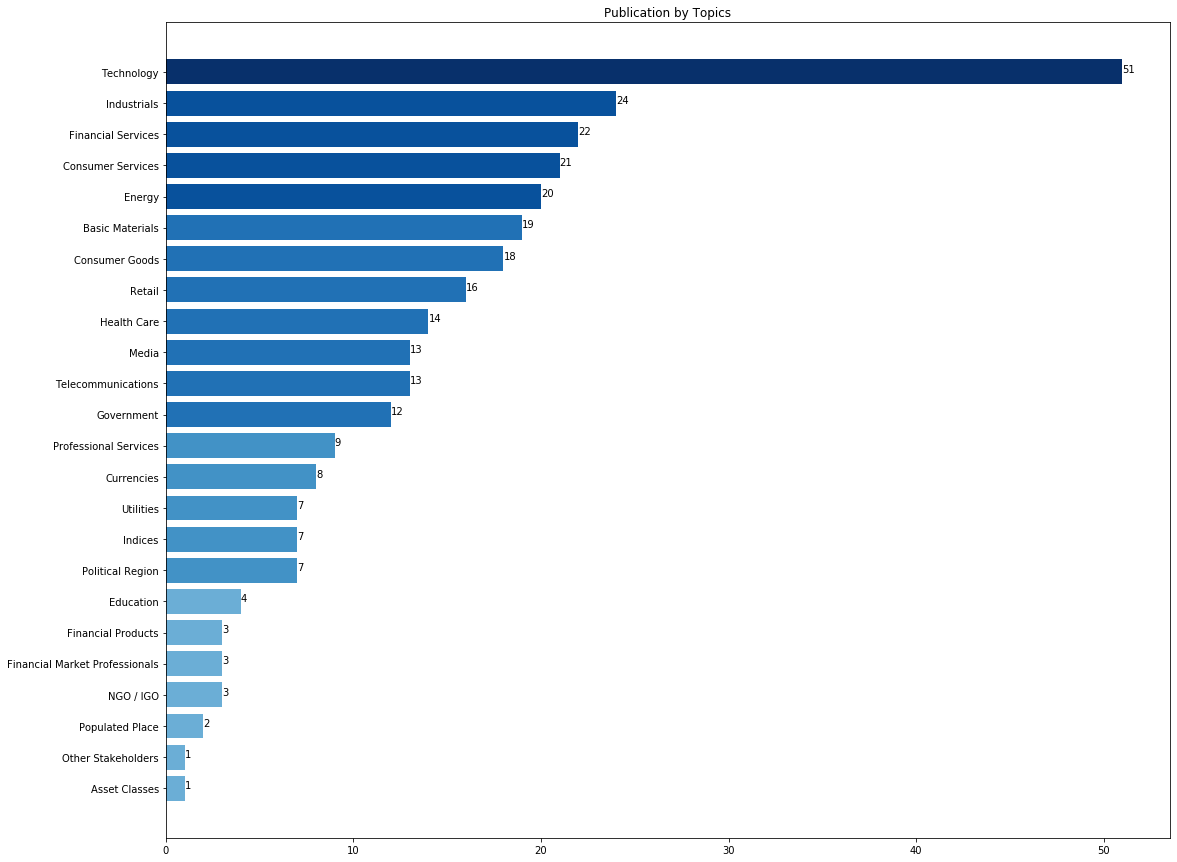

In [90]:
# Data Vizualization
# Visualize aggregations 2a, 2b
all_topic_summary = agg_topic.values
all_topic_name = agg_topic.index
colors = ['#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#4292c6','#4292c6','#4292c6','#4292c6','#4292c6', '#2171b5',
          '#2171b5','#2171b5','#2171b5','#2171b5','#2171b5','#2171b5','#08519c', '#08519c', '#08519c', '#08519c', '#08306b']

fig = plt.figure(figsize = (18,15))
ax = fig.add_subplot(111)
    
plt.barh(y = all_topic_name, width = all_topic_summary, orientation = 'horizontal', color=colors)
plt.title('Publication by Topics')

for index,val in enumerate(all_topic_summary):
    ax.text(val,index,str(val))

Text(0.5, 1.0, 'Publication by Topics and Language')

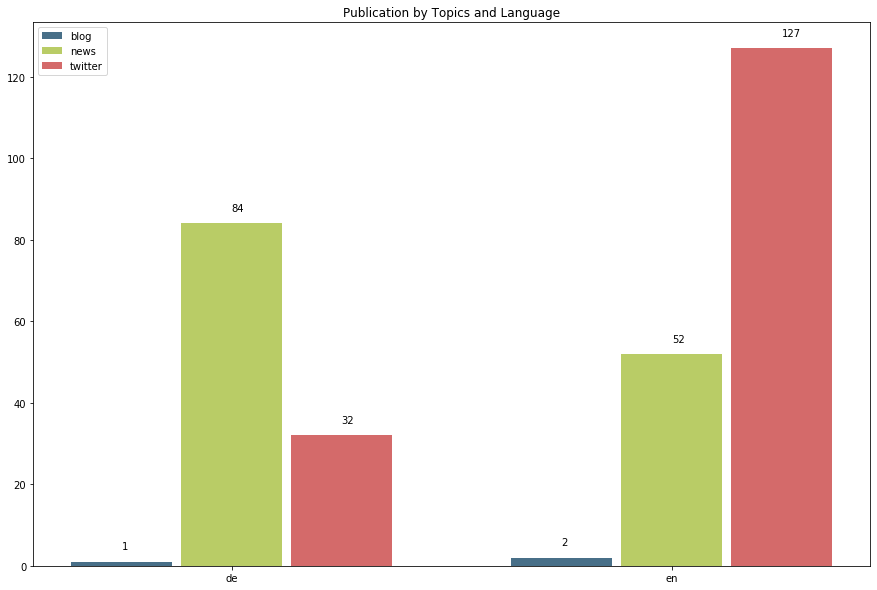

In [303]:
agg_language_channel
agg_language_channel_reset = agg_language_channel.reset_index()

width = 0.55

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)
languages = agg_language_channel_reset['publication_language'].drop_duplicates().values
channels = agg_language_channel_reset['publication_channel'].drop_duplicates().values
colors = ['#486F88', '#B9CC66', '#D46A6A']
xticks = []
xticklabels = []
        
## Create chart and legend
for channel_idx, channel in enumerate(channels):
    counts = []
    indexes = []
    lang_indexes = []
    for idx,language in enumerate(languages):
        is_valid_condition = ((agg_language_channel_reset['publication_language'] == language) & (agg_language_channel_reset['publication_channel'] == channel))
        counts.append(int(agg_language_channel_reset[is_valid_condition]['publication_id']))
        indexes.append(agg_language_channel_reset[is_valid_condition].index[0])
        lang_indexes.append(idx)
    
    x_chart = (np.array(indexes) + np.array(lang_indexes))*0.6
    plt.bar(x_chart, counts, width=width, color=colors[channel_idx], label=channel)

    for x,y, dis in zip(indexes, counts, lang_indexes):
        ax.text((x + dis) * 0.6, y+ 3, str(y))

## Add groups name
for idx, language in enumerate(languages):
    is_valid_condition = ((agg_language_channel_reset['publication_language'] == language))
    indexes = agg_language_channel_reset[is_valid_condition].index
    mid = math.floor(len(indexes) / 2)
    xticks.append((indexes[mid] + idx ) * 0.6)
    xticklabels.append(language)     
    
ax.legend()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
plt.title('Publication by Topics and Language')

In [313]:
publications_cleaned

,publication_time,publication_id,duplicate_id,publication_channel,publication_language,predicted_relevance_probability,topic,is_relevant,verification_date,is_na,is_empty
807,2017-05-08T06:40:20,591012df26d81503c1dd7a3e,560ce3c275cb1d1a549e4f11,twitter,en,0.6996,Financial Market Professionals,TRUE,2017-09-05,0,0
1042,2017-07-23T17:26:19,5974dc45ccef280072e77b36,565e44a6f44fe80f96e98ff5,twitter,en,0.8606,Technology,TRUE,2017-07-25,0,0
907,2017-06-26T20:00:01,595168c493fc530e398ea9b4,565e7570f44fe81072d121e1,twitter,en,0.8687,Financial Services,TRUE,2017-06-28,0,0
480,2017-06-08T09:03:14,5939142f5ee4fa22653bee49,566e3f14324fab282082cbca,twitter,en,0.8695,Currencies,TRUE,2017-09-06,0,0
657,2017-06-05T12:36:21,593550f61a208e0a8d0dafaa,56af978d324fab2160b8820d,twitter,en,0.7733,Telecommunications,TRUE,2017-12-06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1403,2017-07-19T20:31:38,596fc1b4ca8ebc034275fa98,596fc18eca8ebc034275ca21,twitter,en,0.8689,Basic Materials,TRUE,2017-07-21,0,0
1412,2017-07-20T03:55:03,597029a2ca8ebc0342e8cad7,597025feca8ebc0342e54c0c,twitter,en,0.9745,Currencies,TRUE,2017-07-21,0,0
1414,2017-07-20T06:40:40,59705073ca8ebc034207fcb1,59704e9dca8ebc0342069e90,twitter,en,0.9883,Currencies,TRUE,2017-07-21,0,0
1426,2017-07-21T15:52:28,59722347ccef280068f62f3d,5971e9c0ccef280068b0e8d9,twitter,en,0.8697,Professional Services,TRUE,2017-07-26,0,0


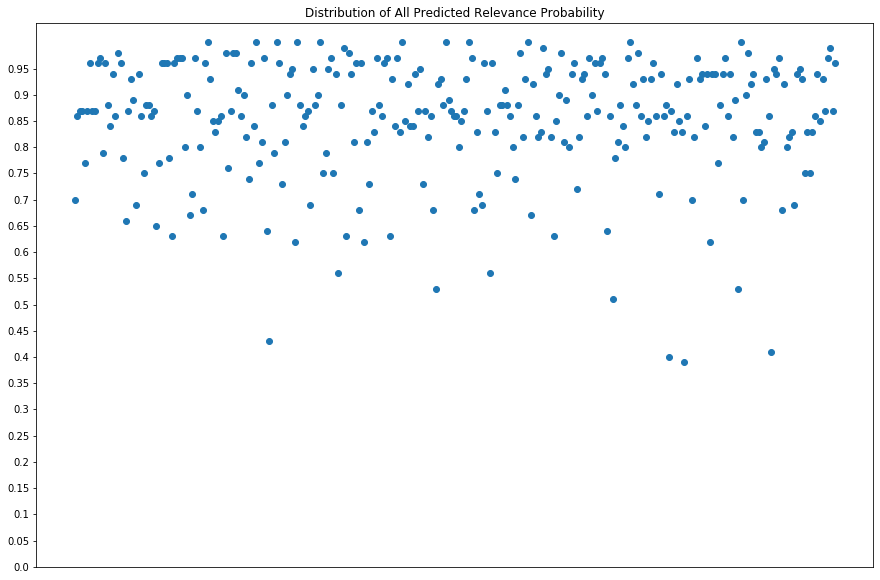

In [383]:
# Visualize the distribution of all predicted_relevance_probability values

plt.figure(figsize=(15,10))

predicted_relevance_probability = np.round(np.array(publications_cleaned['predicted_relevance_probability'], dtype=float),2)

plt.scatter(x = publications_cleaned['publication_id'], y = predicted_relevance_probability)
plt.yticks(np.arange(0, 1, step=0.05),np.round(np.arange(0, 1, step=0.05),2))
plt.xticks([],[])
plt.title('Distribution of All Predicted Relevance Probability')
plt.show()

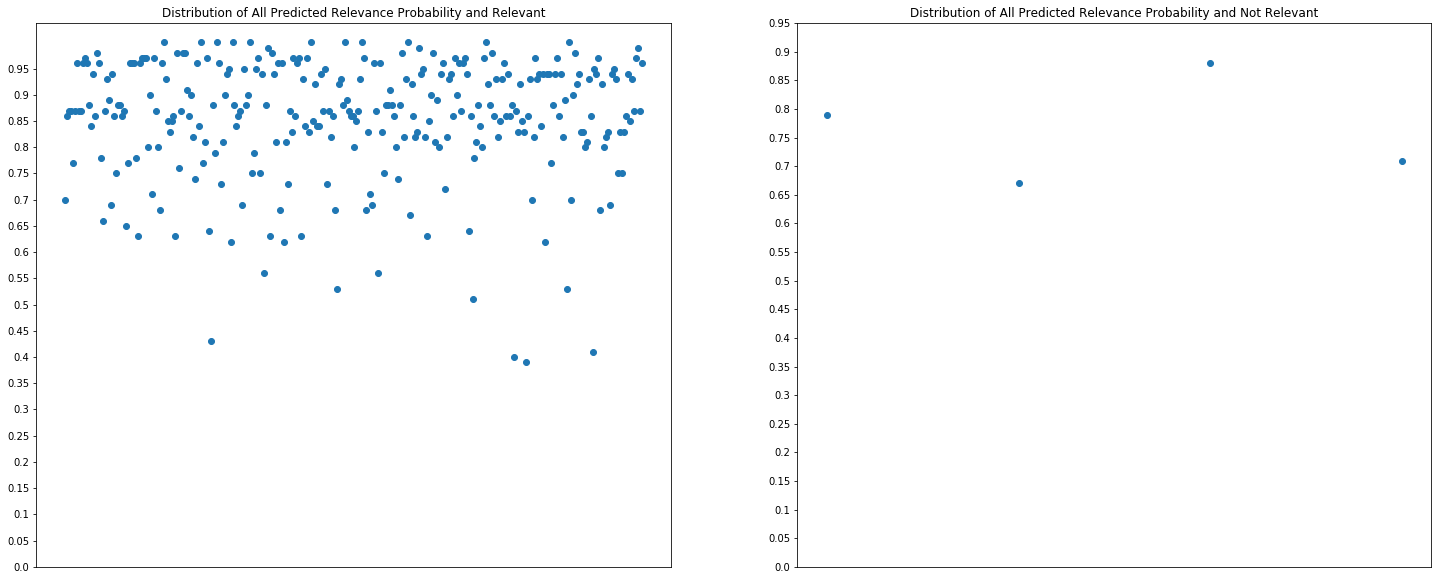

In [404]:
# Compare the distribution of predicted_relevance_probability when is_relevant = True against when is_relevant = False
fig = plt.figure(figsize=(25,10))

plt.subplot(121)
is_relevant = publications_cleaned['is_relevant'] == 'TRUE'

predicted_relevance_probability = np.round(np.array(publications_cleaned[is_relevant]['predicted_relevance_probability'], dtype=float),2)

plt.scatter(x = publications_cleaned[is_relevant]['publication_id'], y = predicted_relevance_probability)
plt.yticks(np.arange(0, 1, step=0.05),np.round(np.arange(0, 1, step=0.05),2))
plt.xticks([],[])
plt.title('Distribution of All Predicted Relevance Probability and Relevant')

plt.subplot(122)
not_relevant = publications_cleaned['is_relevant'] == 'FALSE'

predicted_relevance_probability = np.round(np.array(publications_cleaned[not_relevant]['predicted_relevance_probability'], dtype=float),2)

plt.scatter(x = publications_cleaned[not_relevant]['publication_id'], y = predicted_relevance_probability)
plt.yticks(np.arange(0, 1, step=0.05),np.round(np.arange(0, 1, step=0.05),2))
plt.xticks([],[])
plt.title('Distribution of All Predicted Relevance Probability and Not Relevant')
plt.show()

In [405]:
# Visualize aggregation 2c above
agg_language_topic_relevant

publication_language  topic                           is_relevant
de                    Basic Materials                 TRUE            9
                      Consumer Goods                  TRUE           13
                      Consumer Services               TRUE            9
                      Currencies                      TRUE            1
                      Energy                          TRUE            5
                      Financial Services              FALSE           1
                                                      TRUE            9
                      Government                      TRUE            1
                      Health Care                     TRUE            6
                      Indices                         TRUE            2
                      Industrials                     TRUE           19
                      Media                           TRUE            2
                      NGO / IGO                       TRUE            